In [16]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(10))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Train on 7200 samples, validate on 801 samples
Epoch 1/20
7200/7200 [==============================] - 4s 599us/sample - loss: 2.8707 - acc: 0.1586 - val_loss: 1.9062 - val_acc: 0.2971
Epoch 2/20
7200/7200 [==============================] - 4s 540us/sample - loss: 1.4223 - acc: 0.5260 - val_loss: 0.7885 - val_acc: 0.7628
Epoch 3/20
7200/7200 [==============================] - 4s 537us/sample - loss: 0.8281 - acc: 0.7507 - val_loss: 0.5132 - val_acc: 0.8302
Epoch 4/20
7200/7200 [==============================] - 4s 543us/sample - loss: 0.5843 - acc: 0.8251 - val_loss: 0.4470 - val_acc: 0.8639
Epoch 5/20
7200/7200 [==============================] - 4s 541us/sample - loss: 0.5039 - acc: 0.8542 - val_loss: 0.4482 - val_acc: 0.8689
Epoch 6/20
7200/7200 [==============================] - 4s 536us/sample - loss: 0.4164 - acc: 0.8813 - val_loss: 0.4153 - val_acc: 0.8876
Epoch 7/20
7200/7200 [==============================] - 4s 547us/sample - loss: 0.3669 - acc: 0.8965 - val_loss: 0.3794 - val

Saved model to disk
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


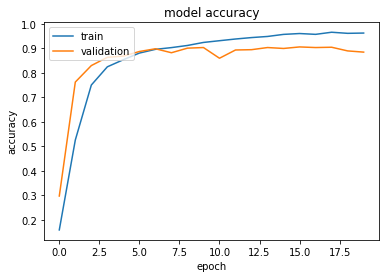

In [17]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('kerasmodel.h5')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


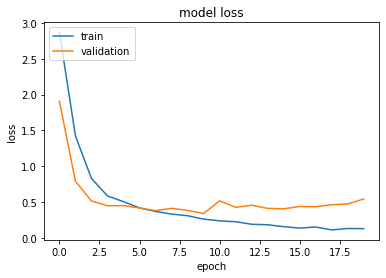

In [18]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [20]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=32)
print('test loss, test acc:', results)



# Evaluate on test data
2001/2001 [==============================] - 0s 141us/sample - loss: 0.4976 - acc: 0.8896
test loss, test acc: [0.4975558100552156, 0.8895552]


In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix

predict = model.predict(X_test)
predict_class = np.argmax(predict, axis=1)
predict_class = predict_class.tolist()
predict_class

[1,
 4,
 6,
 2,
 3,
 1,
 2,
 1,
 0,
 2,
 4,
 4,
 3,
 0,
 2,
 3,
 1,
 5,
 0,
 3,
 4,
 6,
 0,
 3,
 2,
 6,
 1,
 2,
 9,
 0,
 3,
 6,
 5,
 2,
 8,
 1,
 3,
 5,
 8,
 2,
 3,
 9,
 3,
 2,
 4,
 6,
 6,
 9,
 1,
 6,
 8,
 6,
 7,
 6,
 7,
 0,
 6,
 2,
 1,
 1,
 4,
 8,
 5,
 3,
 5,
 8,
 4,
 3,
 2,
 3,
 6,
 6,
 0,
 3,
 4,
 0,
 3,
 3,
 6,
 8,
 0,
 4,
 9,
 8,
 7,
 5,
 8,
 2,
 5,
 9,
 6,
 8,
 2,
 8,
 2,
 2,
 3,
 4,
 2,
 2,
 3,
 6,
 8,
 4,
 3,
 7,
 0,
 0,
 0,
 9,
 4,
 2,
 8,
 6,
 0,
 9,
 6,
 1,
 0,
 0,
 3,
 4,
 7,
 1,
 7,
 2,
 8,
 8,
 3,
 6,
 0,
 6,
 7,
 9,
 1,
 2,
 5,
 7,
 6,
 0,
 5,
 8,
 0,
 7,
 7,
 2,
 5,
 6,
 1,
 8,
 2,
 9,
 5,
 1,
 5,
 1,
 1,
 2,
 3,
 1,
 1,
 3,
 7,
 8,
 3,
 2,
 3,
 0,
 9,
 8,
 3,
 1,
 3,
 4,
 2,
 9,
 3,
 7,
 8,
 4,
 1,
 1,
 9,
 5,
 1,
 6,
 8,
 1,
 7,
 9,
 4,
 7,
 7,
 2,
 9,
 6,
 6,
 1,
 6,
 8,
 9,
 3,
 9,
 0,
 4,
 3,
 1,
 7,
 2,
 7,
 9,
 6,
 5,
 7,
 0,
 0,
 3,
 8,
 2,
 2,
 3,
 7,
 6,
 8,
 0,
 5,
 4,
 1,
 2,
 0,
 3,
 1,
 7,
 4,
 5,
 9,
 9,
 2,
 7,
 0,
 9,
 1,
 5,
 2,
 2,
 4,
 1,
 9,
 8,
 7,


In [22]:
import seaborn as sn
import pandas as pd
cm =confusion_matrix(y_test, predict_class)
cm

array([[186,   2,   3,   2,   1,   0,   4,   1,   2,   0],
       [  2, 190,   6,   2,   0,   1,   0,   1,   0,   2],
       [  1,  11, 158,   4,   2,   0,   3,   6,   2,   0],
       [  1,   1,   5, 195,   0,  11,   0,   0,   6,   1],
       [  0,   1,   6,   5, 156,   6,   0,   1,   0,   0],
       [  0,   0,   4,   7,   3, 179,   1,   2,   1,   0],
       [  1,   0,  23,   0,   1,   1, 163,   2,   1,   0],
       [  0,   0,   6,   8,   1,   2,   0, 174,   2,   0],
       [  2,   6,   8,   7,   2,   2,   1,   2, 203,   1],
       [  1,   5,   4,   8,   0,   3,   0,   1,   0, 176]], dtype=int64)

In [23]:
CATEGORIES = ["apple","banana","baseball","bee","camera","car","clock","diamond","hand","tornado"]

df_cm = pd.DataFrame(cm, index = [i for i in CATEGORIES],
                  columns = [i for i in CATEGORIES])

df_cm

,apple,banana,baseball,bee,camera,car,clock,diamond,hand,tornado
apple,186,2,3,2,1,0,4,1,2,0
banana,2,190,6,2,0,1,0,1,0,2
baseball,1,11,158,4,2,0,3,6,2,0
bee,1,1,5,195,0,11,0,0,6,1
camera,0,1,6,5,156,6,0,1,0,0
car,0,0,4,7,3,179,1,2,1,0
clock,1,0,23,0,1,1,163,2,1,0
diamond,0,0,6,8,1,2,0,174,2,0
hand,2,6,8,7,2,2,1,2,203,1
tornado,1,5,4,8,0,3,0,1,0,176


In [24]:
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
num_classes = 10
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))

In [25]:
precision = TP/(TP+FP)
precision

array([0.95876289, 0.87962963, 0.70852018, 0.81932773, 0.93975904,
       0.87317073, 0.94767442, 0.91578947, 0.93548387, 0.97777778])

In [26]:
recall = TP/(TP+FN)
recall

array([0.92537313, 0.93137255, 0.84491979, 0.88636364, 0.89142857,
       0.90862944, 0.84895833, 0.9015544 , 0.86752137, 0.88888889])

In [27]:
f1 = 2*precision*recall/(precision+recall)
f1

array([0.94177215, 0.9047619 , 0.77073171, 0.85152838, 0.91495601,
       0.89054726, 0.8956044 , 0.90861619, 0.90022173, 0.93121693])